In this notebook we prove Theorem 7.2; the goal is to compute all the plane projective curves $C_8$ in $\mathbb{P}^2$  (over $\mathbb{C}$) with the following properties:
- The singular locus of $C_8$ is composed by six singular points of type $\mathbb{E}_6$ 
- There is a projective automorphism $\Phi_3$ of order $3$ such that $\Phi_3(C)=C$.

It is not hard to see that $\Phi_3$ has only isolated fixed points and two of them are in $C_8$. Let us consider the image $D_8$ of $C_8$ in $\mathbb{P}^2/\Phi_3$ by the quotient $\pi$. This orbifold has three singular points, two of them in $D_8$. In the paper we construct a Cremona transformation, such that it is equivalent to look for a curve $D$ in $\mathbb{P}^2$, up to projective isomorphism, having three irreducible components $C$ (of degree $8$) and $L_1,L_2$ (lines) with the following properties:

- $C$ has two singularities $P_1,P_2$ of type $\mathbb{E}_6$.
- $C$ has two singularities $P_3,P_4$, with three smooth tangent branches $A_1,A_2,A_3$, where $A_1\cdot A_2=3$ and $A_1\cdot A_3=A_2\cdot A_3=2$.
- The lines $L_1, L_2$ are tangent to $C$ at $P_3,P_4$ having intersection number three with the two branches.

With these conditions we can choose coordinates such that $P_3=[1:0:0]$ (with $L_1:y=0$) and $P_4=[0:1:0]$ (with $L_2:x=0$). The rational map $\pi\circ\Phi_3:\mathbb{P}^2\dashrightarrow\mathbb{P}^2$ has coordinates $[x:y:z]\mapsto[x^3:y^3:xyz]$.

We define the following rings in `Sagemath`:
- `R0`, ring in $45$ variables (the number of monomials of degree $8$).
- `R1,R2`, rings of polynomials with coefficients in `R0`, in two and three variables.

We consider a *generic* polynomial $f$ for the equation of $C$. Since $C$ cannot pass through $[0:0:1]$, the coefficient of $z^8$ does not vanish and it can be assumed to be $1$.

**Note.** Some of the verifications can be *expensive*. Changing the variable ``verif`` to ``True``, it performs it. It can be changed independently at various places.

In [1]:
verif = False
R0 = PolynomialRing(QQ, 'a', 45)
R0.inject_variables(verbose=False)
R1.<x, y, z> = R0[]
R2.<u, v> = R0[]
f = vector(R0.gens()) * vector(x^i * y^j * z^(8 - i - j) for i in (0 .. 8) for j in (0 .. 8 - i))
print("The coefficient of z^8 is", f.monomial_coefficient(z^8))
f = f.map_coefficients(lambda _: _.subs(a0=1))

The coefficient of z^8 is a0


With these conditions the Newton polytopes at $P_3,P_4$ are fixed and conditions can be imposed to eliminate variables.

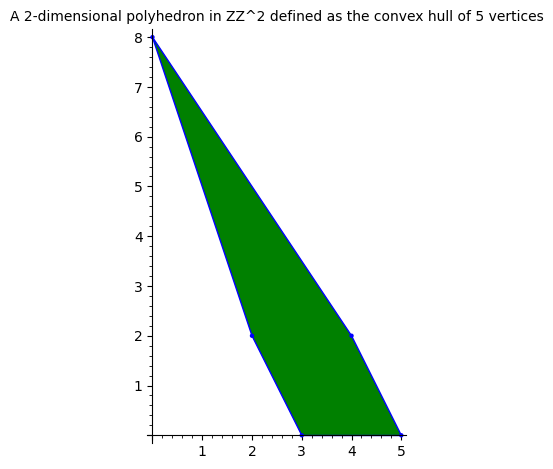

In [2]:
L = [f.monomial_coefficient(x^i * y^j * z^k) for i, j, k in f.exponents() if 3 * i + k < 8 or 3 * j + k < 8]
f = f.map_coefficients(lambda _: _.reduce(L))
f(x=1, y=u, z=v).newton_polytope()

The original ring `R0` had two many variables. We simplify it and we construct also a new ring `R3` in one variable

In [3]:
vrs = list(Set(flatten([_.variables() for _ in f.coefficients()]))) + [a39, a40]
vrs.sort()
R0 = PolynomialRing(QQ, vrs)
R0.inject_variables(verbose=False)
R1.<x, y, z> = R0[]
R2.<u, v> = R0[]
R3.<t> = R0[]
f = R1(f)

We put the two $\mathbb{E}_6$ points at $[1:1:1]$ and $[a_{39}:1:a_{40}]$. We impose a point of multiplicity three with an irreducible reduced tangent cone.
With these conditions the projective automorphisms sending such a curve to another one with the same properties are the identity and $[x:y:z]\mapsto[y:x:z]$.

In [4]:
f1 = f(x=u + 1, y=1, z=v + 1)
L = [f1.monomial_coefficient(u^i * v^j) for i, j in f1.exponents() if i + j < 3]
cs = [f1.monomial_coefficient(u^i * v^(3 - i)) for i in (0 .. 3)]
L += [9 * cs[0] * cs[3] - cs[1] * cs[2], 3 * cs[0] * cs[2] - cs[1]^2, 3 * cs[1] * cs[3] - cs[2]^2]
f2 = f(x=u + a39, y=1, z=v + a40)
L += [f2.monomial_coefficient(u^i * v^j) for i, j in f2.exponents() if i + j < 3]
cs = [f2.monomial_coefficient(u^i * v^(3 - i)) for i in (0 .. 3)]
L += [9 * cs[0] * cs[3] - cs[1] * cs[2], 3 * cs[0] * cs[2] - cs[1]^2, 3 * cs[1] * cs[3] - cs[2]^2]
len(L)

18

We obtain $18$ conditions. Unfortunately, solving them directly is impossible and we have to take a longer way. We load some functions to make the following process. We are going to construct a *tree* ``Ls`` of lists of lists of polynomials. The root of this tree is `[L]`. There is a choice of a variable in one polynomial in the last list to produce resultants eliminating the equation and the variable. For each choice of factor in each resultant we produce a new list
to be added, generating the next step of the tree.

In [5]:
load('functions/functions.sage')

We start the process. We define a list `Ls`, whose only element is the list `L` of conditions.
There was a previous process of reduction that had some choices. In order to guarantee a process that was successful, we fix the equations to reduce and also the variables to eliminate. 

In [6]:
Ls = [L]
for i, vr in [(2, a21), (3, a18), (1, a28), (0, a29), (0, a33), (0, a32), (5, a38)]:
    Ls, L1, Lf = reducir_paso(Ls, i, vr)

(1, 0, 9, 1)
Number of variables:  15
Number of equations 17
(1, 0, 8, 1)
Number of variables:  14
Number of equations 16
(1, 0, 7, 1)
Number of variables:  13
Number of equations 15
(1, 0, 11, 1)
Number of variables:  12
Number of equations 14
(1, 0, 10, 1)
Number of variables:  11
Number of equations 13
(1, 0, 9, 1)
Number of variables:  10
Number of equations 12
(1, 4, 31, 2)
Number of variables:  9
Number of equations 11
4 0 a39
4 1 number of terms:  92
5 0 a39
5 1 number of terms:  140
6 0 a39 - 1
6 1 a39
6 2 number of terms:  61
7 0 a39 - 1
7 1 a39
7 2 number of terms:  110
8 0 a39
8 1 number of terms:  1597
9 0 a39
9 1 number of terms:  1129


Till now the tree was lineal. Actually the *short* factors $a_{39}, a_{39}-1$ correspond to degenerated solutions, and the tree continues to be linear.

In [7]:
Ls[-1] = [_[-1] for _ in Lf]

In [8]:
for i, vr in [(6, a26), (4, a11), (5, a19), (4, a34)]:
    Ls, L1, Lf = reducir_paso(Ls, i, vr)

(1, 7, 52, 9)
Number of variables:  8
Number of equations 10
(1, 11, 131, 24)
Number of variables:  7
Number of equations 9
(1, 15, 243, 48)
Number of variables:  6
Number of equations 8
(1, 18, 301, 71)
Number of variables:  5
Number of equations 7
0 0 a40 - 1
0 1 number of terms:  3107
2 0 a40 - 1
2 1 number of terms:  3064
3 0 a40 - 1
3 1 -a40^2 + a39
3 2 number of terms:  251
4 0 a40 - 1
4 1 number of terms:  3357
6 0 a40 - 1
6 1 number of terms:  3368


The factors $a_{40}-1, a_{40}^2-a_{39}$ correspond also to degenerate solutions.

In [9]:
Ls[-1] = [_[-1] for _ in Lf]

In [10]:
Ls,L1,Lf = reducir_paso(Ls, 3, a20)

(1, 16, 199, 52)
Number of variables:  4
Number of equations 6
2 0 a40
2 1 number of terms:  918
3 0 a40
3 1 number of terms:  1039
5 0 a40
5 1 number of terms:  918


The same happens for $a_{40}$.

In [11]:
Ls[-1] = [_[-1] for _ in Lf]

In [12]:
Ls,L1,Lf = reducir_paso(Ls, 2, a27)

(2, 24, 823, 95)
Number of variables:  3
Number of equations 5
0 0 number of terms:  65
0 1 number of terms:  514
1 0 number of terms:  110
1 1 number of terms:  514


In [13]:
[len(_) for _ in Lf]

[2, 2, 1, 1, 1]

Since two of the equations have two factors, the tree continues with four new vertices. We treat them one by one. The last one has the longest factors.

In [14]:
Ls0, Ls1, Ls2, Ls3 = nuevos(Ls, Lf)

We consider the case `Ls3`. We end with four equations in two variables that we study separately. There is no solution and some of the computations may take a while.

We eliminate the variable $a_{39}$ and we have a list of $8$ possible cases for $a_{40}$.

In [15]:
Ls3, L1, Lf = reducir_paso(Ls3, 0, a10)
fcts = []
for u in cartesian_product(Lf):
    CT1 = rslt([(u[0], v, a39) for v in u[1:]])
    T1 = [b[1] for b in CT1]
    u = gcd(T1).factor()
    fcts += [_[0] for _ in u]
fcts = list(Set(fcts))
fcts.sort()
for p in fcts:
    print(p)

(1, 12, 36, 29)
Number of variables:  2
Number of equations 4
0 0 number of terms:  4
0 1 number of terms:  8
0 2 number of terms:  12
1 0 number of terms:  165
1 1 number of terms:  376
2 0 number of terms:  184
2 1 number of terms:  404
3 0 number of terms:  146
3 1 number of terms:  349
a40
a40 - 4
a40 - 1
a40 + 2
a40 + 5
16*a40 - 1
a40^2 + 14*a40 - 3
17*a40^2 + 20*a40 - 1


We discard first the values of $a_{40}$ in $\mathbb{Q}$. We know already that $0,1$ have degenerate solutions. Let us check $\frac{1}{6},4,-2,-5$. We evaluate $a_{40}$ in the previous set of equations, getting polynomials in $a_{39}$ and compute their `gcd`; as it is $1$, there is no solution.

In [16]:
for u in [1 / 16, 4, -2, -5]:
    print(gcd([_(a40=u) for _ in Ls3[-2]]).factor())

1
1
1
1


For the positions $5, 6$, the value of $a_{40}$ lives in a number field. We change thechnically the approach.

In [17]:
for u in [6, 7]:
    R0.inject_variables(verbose=False)
    Rs.<s> = QQ[]
    p1 = fcts[u](a40=s)
    K1.<aa40> = NumberField(p1)
    RK1 = R1.change_ring(K1)
    RK0 = R0.change_ring(K1)
    RK2 = R2.change_ring(K1)
    RK10 = R1.change_ring(RK0)
    RK0.inject_variables(verbose=False)
    Rs1.<s1> = K1[]
    gc = gcd([_(a40=aa40) for _ in Ls3[-2]]).factor()
    print("For the case", p1, "the gcd is", gc)
R0.inject_variables(verbose=False)

For the case s^2 + 14*s - 3 the gcd is 1
For the case 17*s^2 + 20*s - 1 the gcd is 1


We discard the solutions for `Ls2` and `Ls1` in the following cells.

In [18]:
Ls2, L1, Lf = reducir_paso(Ls2, 0, a10)    
fcts = []
for u in cartesian_product(Lf):
    CT1 = rslt([(u[0], v, a39) for v in u[1:]])
    T1 = [b[1] for b in CT1]
    u = gcd(T1).factor()
    fcts += [_[0] for _ in u]
fcts = list(Set(fcts))
fcts.sort()
for p in fcts:
    print(p)

(1, 12, 36, 29)
Number of variables:  2
Number of equations 4
0 0 number of terms:  4
0 1 number of terms:  8
0 2 number of terms:  49
1 0 number of terms:  165
1 1 number of terms:  376
2 0 number of terms:  184
2 1 number of terms:  404
3 0 number of terms:  146
3 1 number of terms:  349
a40
a40 - 4
a40 - 1
a40 + 2
a40 + 5
16*a40 - 1
a40^2 + 14*a40 - 3
17*a40^2 + 20*a40 - 1


In [19]:
for u in [1 / 16, 4, -2, -5]:
    print(gcd([_(a40=u) for _ in Ls2[-2]]).factor())

1
1
1
1


In [20]:
for u in [6, 7]:
    R0.inject_variables(verbose=False)
    Rs.<s> = QQ[]
    p1 = fcts[u](a40=s)
    K1.<aa40> = NumberField(p1)
    RK1 = R1.change_ring(K1)
    RK0 = R0.change_ring(K1)
    RK2 = R2.change_ring(K1)
    RK10 = R1.change_ring(RK0)
    RK0.inject_variables(verbose=False)
    Rs1.<s1> = K1[]
    gc = gcd([_(a40=aa40) for _ in Ls3[-2]]).factor()
    print("For the case", p1, "the gcd is", gc)
R0.inject_variables(verbose=False)

For the case s^2 + 14*s - 3 the gcd is 1
For the case 17*s^2 + 20*s - 1 the gcd is 1


In [21]:
Ls1, L1, Lf = reducir_paso(Ls1, 1, a10)
fcts = []
for u in cartesian_product(Lf):
    CT1 = rslt([(u[0], v, a39) for v in u[1:]])
    T1 = [b[1] for b in CT1]
    u = gcd(T1).factor()
    fcts += [_[0] for _ in u]
fcts = list(Set(fcts))
fcts.sort()
for p in fcts:
    print(p)

(1, 15, 60, 50)
Number of variables:  2
Number of equations 4
0 0 number of terms:  4
0 1 number of terms:  8
0 2 number of terms:  25
0 3 number of terms:  91
1 0 number of terms:  257
1 1 number of terms:  533
2 0 number of terms:  277
2 1 number of terms:  561
3 0 number of terms:  237
3 1 number of terms:  502
a40
a40 - 4
a40 - 1
a40 + 2
a40 + 5
2*a40 - 5
2*a40 + 3
16*a40 - 1
a40^2 + 14*a40 - 3
155*a40^2 - 490*a40 + 11
121*a40^4 - 730*a40^3 + 276*a40^2 + 8012*a40 - 2738


In [22]:
for u in [1 / 16, -2, -5, 5 / 2, -3 / 2]:
    print(gcd([_(a40=u) for _ in Ls1[-2]]).factor())

1
1
1
1
1


In [23]:
for u in [8, 9, 10]:
    R0.inject_variables(verbose=False)
    Rs.<s> = QQ[]
    p1 = fcts[u](a40=s)
    K1.<aa40> = NumberField(p1)
    RK1 = R1.change_ring(K1)
    RK0 = R0.change_ring(K1)
    RK2 = R2.change_ring(K1)
    RK10 = R1.change_ring(RK0)
    RK0.inject_variables(verbose=False)
    Rs1.<s1> = K1[]
    gc = gcd([_(a40=aa40) for _ in Ls3[-2]]).factor()
    print("For the case", p1, "the gcd is", gc)
R0.inject_variables(verbose=False)

For the case s^2 + 14*s - 3 the gcd is 1
For the case 155*s^2 - 490*s + 11 the gcd is 1
For the case 121*s^4 - 730*s^3 + 276*s^2 + 8012*s - 2738 the gcd is 1


Let us study the last case.

In [24]:
Ls, L1, Lf = reducir_paso(Ls0, 0, a10)

(3, 23, 409, 105)
Number of variables:  2
Number of equations 3
0 0 number of terms:  759
0 1 number of terms:  2168
1 0 number of terms:  872
1 1 number of terms:  2348
2 0 number of terms:  655
2 1 number of terms:  1986


Next computation can be heavy. If it has been done it can be skipped by setting ``verif = False``. In my computer it took:
```
CPU times: user 3.31 s, sys: 179 ms, total: 3.49 s
Wall time: 1h 18min 27s
```

In [25]:
verif = False
if verif:
    fcts = []
    for u in cartesian_product(Lf):
        CT1 = rslt([(u[0], v, a39) for v in u[1:]])
        T1 = [b[1] for b in CT1]
        u = gcd(T1).factor()
        fcts += [_[0] for _ in u]
    fcts = list(Set(fcts))
    fcts.sort()
    save(fcts, 'files3/cnd-3')
else:
    fcts = load('files3/cnd-3.sobj')
for j, p in enumerate(fcts):
    if p.degree() == 1:
        print("The polynomial in position", j, "is", p)
    else:
        print("The degree of the polynomial in position", j, "is", p.degree())

The polynomial in position 0 is a40
The polynomial in position 1 is a40 - 4
The polynomial in position 2 is a40 - 1
The polynomial in position 3 is a40 + 2
The polynomial in position 4 is a40 + 5
The polynomial in position 5 is 2*a40 + 1
The polynomial in position 6 is 2*a40 + 3
The polynomial in position 7 is 16*a40 - 1
The degree of the polynomial in position 8 is 2
The degree of the polynomial in position 9 is 8
The degree of the polynomial in position 10 is 8
The degree of the polynomial in position 11 is 128


In [26]:
save(fcts[-1], 'files3/p128')

We eliminate some candidate of solutions for the cases where $a_{40}$ in $\mathbb{Q}$ or in the extension of index $2$.

In [27]:
for u in [1 / 16, -2, -5, -1 / 2, -3 / 2, 4]:
    print(gcd([_(a40=u) for _ in Ls[-2]]).factor())

1
1
1
1
1
1


In [28]:
R0.inject_variables(verbose=False)
Rs.<s> = QQ[]
p1 = fcts[8](a40=s)
K1.<aa40> = NumberField(p1)
RK1 = R1.change_ring(K1)
RK0 = R0.change_ring(K1)
RK2 = R2.change_ring(K1)
RK10 = R1.change_ring(RK0)
RK0.inject_variables(verbose=False)
Rs1.<s1> = K1[]
gc = gcd([_(a40=aa40) for _ in Ls3[-2]]).factor()
print("For the case", p1, "the gcd is", gc)

For the case s^2 + 14*s - 3 the gcd is 1


For the extension of index $128$, the  computations are long (more than $12$ hours in a server) and consume a lot of RAM memory (more 400Gb). This the code used to check that it gives no solution:
```
R0 = PolynomialRing(QQ, 'a', 45)
R0.inject_variables(verbose=False)
R1.<x, y, z> = R0[]
f = vector(R0.gens()) * vector(x^i * y^j * z^(8 - i - j) for i in (0 .. 8) for j in (0 .. 8 - i))
f = f.map_coefficients(lambda _: _.subs(a0=1))
L = [f.monomial_coefficient(x^i * y^j * z^k) for i, j, k in f.exponents() if 3 * i + k < 8 or 3 * j + k < 8]
f = f.map_coefficients(lambda _: _.reduce(L)
vrs = tuple(Set(flatten([_.variables() for _ in f.coefficients()]))) + (a39, a40)R0 = PolynomialRing(QQ, vrs)
R0 = PolynomialRing(QQ, vrs)
R0.inject_variables(verbose=False)
Rs.<s> = QQ[]
p3 = p128(a40=s)
K3.<aa40> = NumberField(p3)
Ls = load('Ls.sobj')
RK0 = R0.change_ring(K3)
Ls = [[RK0(g) for g in L] for L in Ls]
L = Ls[-1]
qq = [_[0] for _ in gcd([_.subs({a40: aa40}) for _ in L]).factor()]
print(qq)
```
We study the two remaining cases where the index of the field is $8$. This computation takes several minutes. You can avoid it if ``verif=True``

In [29]:
Rs.<s> = QQ[]
p1 = fcts[9](a40=s)
K1.<aa40> = NumberField(p1)
RK0 = R0.change_ring(K1)
RK0.inject_variables(verbose=False)
verif = False
if verif:
    Lsa = [[RK0(p) for p in L] for L in Ls]
    sb1 = {a40: aa40}
    j = -1
    for vr in (a39, a10, a27, a20, a34, a19, a11, a26, a38, a32, a33, a29, a28, a18, a21):
        qq = [_[0] for _ in gcd([_.subs(sb1) for _ in Lsa[j]]).factor()]
        if qq == []:
            print("No solution")
            break
        else:
            sb1[vr] = K1(vr.reduce(qq))
            j += -1
    save([RK0, sb1], 'file3/sb1')
else:
    RK0a, sb1a = load('files3/sb1.sobj')
    K1a = RK0a.base_ring()
    k1a = K1a.embeddings(K1)[0]
    sb1 = {RK0(vr): k1a(sb1a[vr]) for vr in RK0a.gens()}

In [30]:
cfs = [K1(RK0(_).subs(sb1)) for _ in f.coefficients()]

In [31]:
RK1.<x, y, z> = K1[]
SK1.<u, v> = K1[]
f1 = vector(cfs) * vector([x^i * y^j * z^k for i, j, k in f.exponents()])

We have obtained a first solution. Let us check the singularities. For $P_3,P_4$ we see the right Newton polygon:

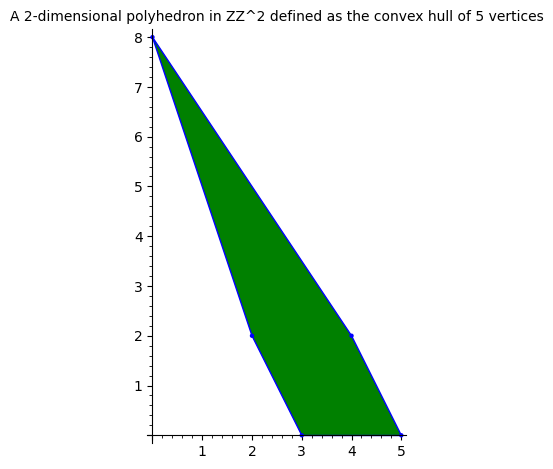

In [32]:
f1(x=1, y=u, z=v).newton_polytope()

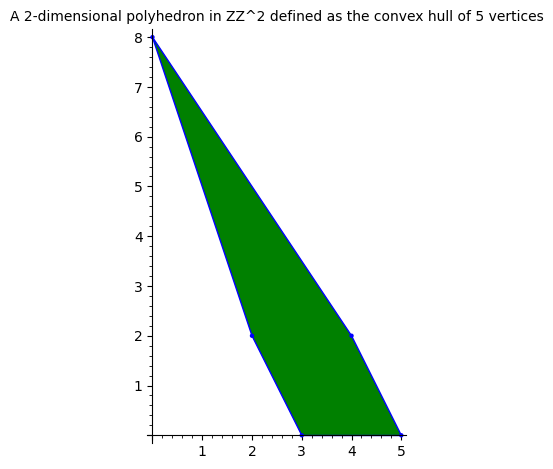

In [33]:
f1(x=u, y=1, z=v).newton_polytope()

For $P_1=[1:1:1]$, we compute first the tangent cone. The following code shows that it is a perfect square

In [34]:
f11 = f1(x=1, y=1 + u,  z=1 + v)
f11tc = sum(a * b for a, b in f11 if b.degree() <= 3)
f11tcfactors= f11tc.factor()
print("powers of the factors of the tangent cone:", [a[1] for a in f11tcfactors])
u11 = u.reduce([a[0] for a in f11tcfactors]).monomial_coefficient(v)

powers of the factors of the tangent cone: [3]


We draw the local newton polygon.

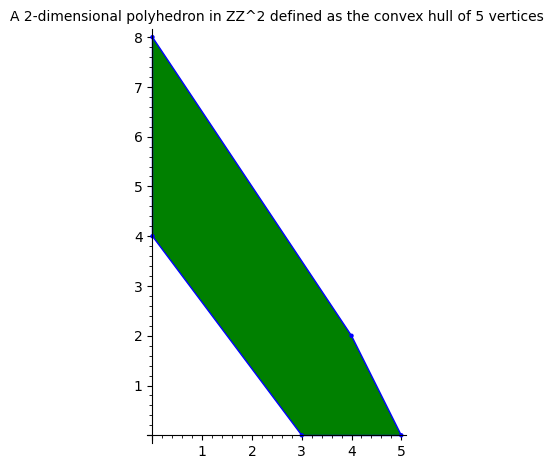

In [35]:
f1(x=1, y=1 + u + u11 * v, z=1 + v).newton_polytope()

We repeat the same procedure for $P_2$.

In [36]:
f12 = f1(x=sb1[a39] + u, y=1,  z=sb1[a40] + v)
f12tc = sum(a * b for a, b in f12 if b.degree() <= 3)
f12tcfactors= f12tc.factor()
print("powers of the factors of the tangent cone:", [a[1] for a in f12tcfactors])
u12 = u.reduce([a[0] for a in f12tcfactors]).monomial_coefficient(v)

powers of the factors of the tangent cone: [3]


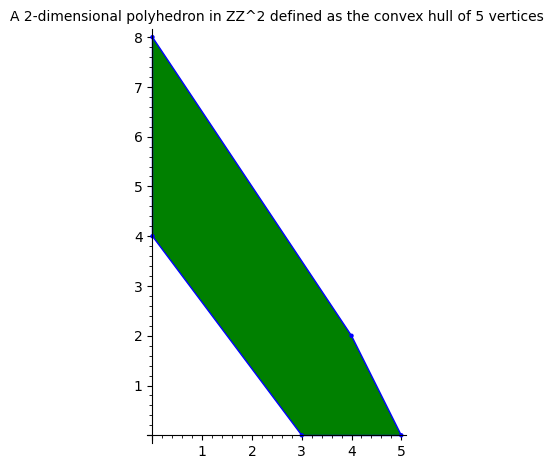

In [37]:
f1(x=sb1[a39] + u + u12 * v, y=1, z=sb1[a40] + v).newton_polytope()

We check the other polynomial of degree $8$ only if needed, since they are projectively equivalent.

In [38]:
verif= False
if verif:
    Rs.<s> = QQ[]
    p2 = fcts[10](a40=s)
    K2.<ab40> = NumberField(p2)
    RK0 = R0.change_ring(K2)
    RK0.inject_variables(verbose=False)
    Lsa = [[RK0(p) for p in L] for L in Ls]
    sb2 = {a40: ab40}
    j = -1
    for vr in (a39, a10, a27, a20, a34, a19, a11, a26, a38, a32, a33, a29, a28, a18, a21):
        qq = [_[0] for _ in gcd([_.subs(sb2) for _ in Lsa[j]]).factor()]
        if qq == []:
            print("No solution")
            break
        else:
            sb2[vr] = K2(vr.reduce(qq))
            j += -1
    ab39 = sb2[a39]
    cfs = [K2(RK0(_).subs(sb2)) for _ in f.coefficients()]
    RK2.<x, y, z> = K2[]
    SK2.<u, v> = K2[]
    f2 = vector(cfs) * vector([x^i * y^j * z^k for i, j, k in f.exponents()])
    h = K2.embeddings(K1)[1]
    cfs0 = [h(b0) for b0 in cfs]
    f0 = vector(cfs0) * vector([RK1(y^i * x^j * z^k) for i, j, k in f2.exponents()])
    print(f0 == f1)

We are going to simplify the presentation of the number field and the presentation of the polynomial.  We apply a transformation to have that $x+y+z=0$ is the line joining the $\mathbb{E}_6$ points and we check that exchanging $x$ and $y$ has the same effect as conjugating (complex conjugation is the non-trivial automorphism of $K_1$).

In [39]:
rct = vector(3 * [1]).cross_product(vector([sb1[a39], 1, sb1[a40]]))
rct = rct / rct[2]
RK1.inject_variables(verbose=False)
f3 = f1(x=x/rct[0], y=y/rct[1])
[(_[0].degree(), _[1]) for _ in f3(z=-(x+y)).factor()]

[(1, 3), (1, 3), (2, 1)]

In [40]:
f3(x=y, y=x) - f3.map_coefficients(K1.automorphisms()[1])

0

In [41]:
pp = K1.primes_of_bounded_norm(4)[1].gen(1).minpoly()
K2.<b0> = NumberField(pp)
h2 = K1.embeddings(K2)[0]
RK1a = RK1.change_ring(K2)
RK1a.inject_variables(verbose=False)

In [42]:
f4 = sum(h2(a) * RK1a(b) for a, b in f3)

The $3$-cyclotomic field is a subfield of $K_2$; $z_3$ is a primitive cubic root of unity in $K_2$. We try to simplify $f_4$ using diagonal change of variables.

In [43]:
C3 = CyclotomicField(3,'r3')
zeta3 = C3.embeddings(K2)[0](C3.gen())

In [44]:
k2 = K2.automorphisms()[1]

In [45]:
print(f4.monomials())

[x^5*y^3, x^4*y^4, x^3*y^5, x^4*y^3*z, x^3*y^4*z, x^4*y^2*z^2, x^3*y^3*z^2, x^2*y^4*z^2, x^3*y^2*z^3, x^2*y^3*z^3, x^2*y^2*z^4, x^2*y*z^5, x*y^2*z^5, x*y*z^6, z^8]


In [46]:
b = f4.monomial_coefficient(x^5 * y^3)
bf = b.factor()
U = [a[0] for a in bf if a[1] == 10]
print(len(U))
x0 = (prod(U))^2 / 19
y0 = k2(x0)
f4a = f4(x=x / x0, y=y / y0)

2


In [47]:
b = f4a.monomial_coefficient(x^3 * y^5)
bf = b.factor()
U = [a[0] for a in bf if a[1] == 6]
print(len(U))
f4b = f4a(x=x * 2, y=y * 2)

0


In [48]:
b = f4b.monomial_coefficient(x^3 * y^3 * z^2)
bf = b.factor()
U = [a[0] for a in bf if a[1] == 6]
x0 = prod(U[1:])
y0 = k2(x0)
f4c = f4b(x=x / x0, y=y / y0)

In [49]:
b = f4c.monomial_coefficient(x^3 * y^3 * z^2)
bf = b.factor()
U = [a[0] for a in bf if a[1] == 6]
x0 = U[0]
y0 = k2(x0)
f4d = f4c(x=x / x0, y=y / y0)

The next goal is to construct the curve $C_8$. A change of variables give a smaller field of coefficients.

In [50]:
F0 = RK1a(f4c(x=x^3, y=y^3, z=x * y * z) / x^8 / y^8)
F1 = F0(x=x + zeta3 * y, y=x + zeta3^-1 * y)
Set([b.minpoly().degree() for b in F1.coefficients()])

{1, 4}

We want to find a better presentation for the field of index $4$. 

In [51]:
pmin4 = (b0 + k2(b0)).minpoly()
K04 = NumberField(pmin4, 'b1')
pmin4a = K04.primes_of_bounded_norm(2)[0].gen(1).minpoly()
K04.<r4> = NumberField(pmin4a)
h04 = K04.embeddings(K2)[0]
pmin4a

x^4 - 2*x^3 + x^2 - 2*x - 2

In [52]:
RK04 = RK1a.change_ring(K04)
RK04.inject_variables(verbose=False)
F2 = vector([h04.preimage(a) for a in F1.coefficients()]) * vector(RK04(m) for m in F1.monomials())

In [53]:
print(F2.monomials())

[x^8, x^7*y, x^6*y^2, x^5*y^3, x^4*y^4, x^3*y^5, x^2*y^6, x*y^7, y^8, x^7*z, x^6*y*z, x^5*y^2*z, x^4*y^3*z, x^3*y^4*z, x^2*y^5*z, x*y^6*z, y^7*z, x^6*z^2, x^5*y*z^2, x^4*y^2*z^2, x^3*y^3*z^2, x^2*y^4*z^2, x*y^5*z^2, y^6*z^2, x^5*z^3, x^4*y*z^3, x^3*y^2*z^3, x^2*y^3*z^3, x*y^4*z^3, y^5*z^3, x^4*z^4, x^3*y*z^4, x^2*y^2*z^4, x*y^3*z^4, y^4*z^4, x^3*z^5, x^2*y*z^5, x*y^2*z^5, y^3*z^5, x^2*z^6, x*y*z^6, y^2*z^6, z^8]


In [54]:
F2a = F2(x=19 * x / (-2*r4^3 + 16*r4^2 - 15*r4 - 2), y = 19^4 * y)

In [55]:
f4d.parent().inject_variables()
f4d(y=x, x=y) - f4d.map_coefficients(k2)

Defining x, y, z


0

In [56]:
latex([bb for bb in reversed(f4d.monomials())])

\left[z^{8}, x y z^{6}, x y^{2} z^{5}, x^{2} y z^{5}, x^{2} y^{2} z^{4}, x^{2} y^{3} z^{3}, x^{3} y^{2} z^{3}, x^{2} y^{4} z^{2}, x^{3} y^{3} z^{2}, x^{4} y^{2} z^{2}, x^{3} y^{4} z, x^{4} y^{3} z, x^{3} y^{5}, x^{4} y^{4}, x^{5} y^{3}\right]

In [57]:
for a, b in f4d:
    print("monomial:", b)
    pr = (a - k2(a)) / (zeta3 - zeta3^2)
    qr = a - zeta3 * pr
    ps = h04.preimage(pr)
    qs = h04.preimage(qr)
    print("invariant coefficient:")
    print(qs)
    print("anti-invariant coefficient:")
    print(ps)
    print("------------------------")

monomial: x^5*y^3
invariant coefficient:
-16576810/19*r4^3 + 42960270/19*r4^2 - 41464096/19*r4 + 57463236/19
anti-invariant coefficient:
-22764536/19*r4^3 + 58881432/19*r4^2 - 56893728/19*r4 + 78729744/19
------------------------
monomial: x^4*y^4
invariant coefficient:
46098372/19*r4^3 - 115337580/19*r4^2 + 113584192/19*r4 - 153214440/19
anti-invariant coefficient:
0
------------------------
monomial: x^3*y^5
invariant coefficient:
6187726/19*r4^3 - 15921162/19*r4^2 + 15429632/19*r4 - 21266508/19
anti-invariant coefficient:
22764536/19*r4^3 - 58881432/19*r4^2 + 56893728/19*r4 - 78729744/19
------------------------
monomial: x^4*y^3*z
invariant coefficient:
-63549276/361*r4^3 + 172802820/361*r4^2 - 162340896/361*r4 + 233220216/361
anti-invariant coefficient:
304964784/361*r4^3 - 790701984/361*r4^2 + 762967392/361*r4 - 1057727232/361
------------------------
monomial: x^3*y^4*z
invariant coefficient:
-368514060/361*r4^3 + 963504804/361*r4^2 - 925308288/361*r4 + 1290947448/361
anti-invar

In [58]:
F2

(547319106/19*r4^3 - 1093166118/19*r4^2 + 1233335808/19*r4 - 1378738260/19)*x^8 + (2321575830/19*r4^3 - 7233862626/19*r4^2 + 6314858496/19*r4 - 9988331292/19)*x^7*y + (32704970022/19*r4^3 - 81672717474/19*r4^2 + 80518932576/19*r4 - 108452911068/19)*x^6*y^2 + (-122028408360/19*r4^3 + 310959516456/19*r4^2 - 303027508512/19*r4 + 414579387888/19)*x^5*y^3 + (182478110418/19*r4^3 - 466225760790/19*r4^2 + 453650502528/19*r4 - 621904121460/19)*x^4*y^4 + (-153604374138/19*r4^3 + 392205206142/19*r4^2 - 381764920608/19*r4 + 523102378212/19)*x^3*y^5 + (64280935800/19*r4^3 - 162918407160/19*r4^2 + 159256344672/19*r4 - 216975901392/19)*x^2*y^6 + (-6700128678/19*r4^3 + 15979191570/19*r4^2 - 16181544960/19*r4 + 21018237372/19)*x*y^7 + (547319106/19*r4^3 - 1093166118/19*r4^2 + 1233335808/19*r4 - 1378738260/19)*y^8 + (-5147491356/361*r4^3 + 13997028420/361*r4^2 - 13149612576/361*r4 + 18890837496/361)*x^7*z + (-63811459800/361*r4^3 + 164146525272/361*r4^2 - 159101851104/361*r4 + 219246042384/361)*x^6*y*z

In [59]:
save([f4d, F0, F2],'files3/octica-3-final')